# 관심 있는 주제, 이유

- 축구 데이터
- 링크 - https://footystats.org/kr/england/premier-league

잉글랜드 프리미어 리그 시즌 중반부 성적을 바탕으로 최종 순위를 예측해보고 싶습니다.

---

# 타이타닉 데이터 전처리 및 EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

### 데이터 불러오기

In [2]:
data = pd.read_csv("Titanic-Dataset.csv")

## 주요 열 설명
1. Survived
승객의 생존 여부를 나타냅니다.
값:
0: 사망
1: 생존

2. Pclass
승객이 탑승한 선실 등급입니다.
값:
1- 1등석
2- 2등석
3- 3등석

3. SibSp
승객과 함께 탑승한 형제자매 및 배우자의 수입니다.

4. Parch
승객과 함께 탑승한 부모 및 자녀의 수입니다.

5. Ticket
승객의 티켓 번호입니다.

6. Fare
티켓 요금입니다.

7. Cabin
승객이 탑승한 선실 번호입니다. 일부 데이터는 결측치로 제공됩니다.

8. Embarked
승객이 탑승한 항구를 나타냅니다.
C: 셰르부르 (Cherbourg)
Q: 퀸스타운 (Queenstown)
S: 사우샘프턴 (Southampton)

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [20]:
print("행 개수:", len(data))
print("열 개수:", len(data.columns))

행 개수: 891
열 개수: 12


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- 크게 이상한 것이 안보임

In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Cabin에 결측치가 많음

In [11]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

1. Cabin 891개 데이터에서 687개가 결측치이므로 열 삭제
2. Embarked가 결측치인 2개 행 삭제
3. Age가 결측치인 177개 행 삭제(아깝지만 대체할 수치를 넣기도 애매함)

In [21]:
df = data.copy()

In [22]:
df = df.drop(columns=["Cabin"])

In [23]:
df = df.dropna(subset=['Embarked'])

In [24]:
df = df.dropna(subset=['Age'])

- 결측치가 다 처리됨.

In [26]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### 주요 열 시각화

- 남성 수가 여성에 비해 2배 정도 많음

c:\Users\chldu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Sex', ylabel='Count'>

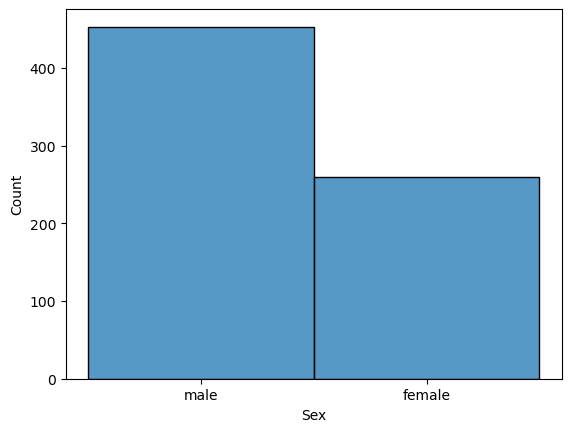

In [29]:
sns.histplot(x= "Sex",data=df)

c:\Users\chldu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

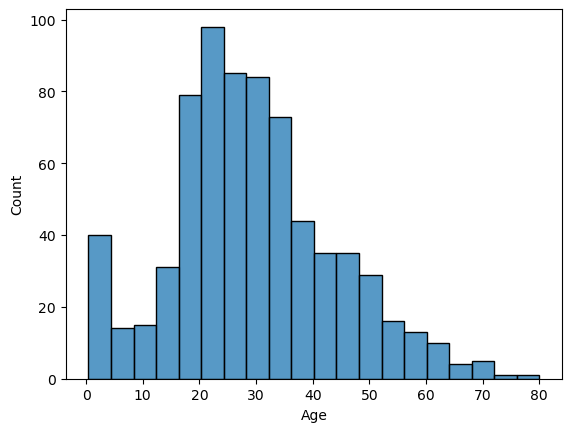

In [30]:
sns.histplot(x= "Age",data=df)

- 생존자보다 사망자가 더 많다.

<Axes: xlabel='Survived', ylabel='count'>

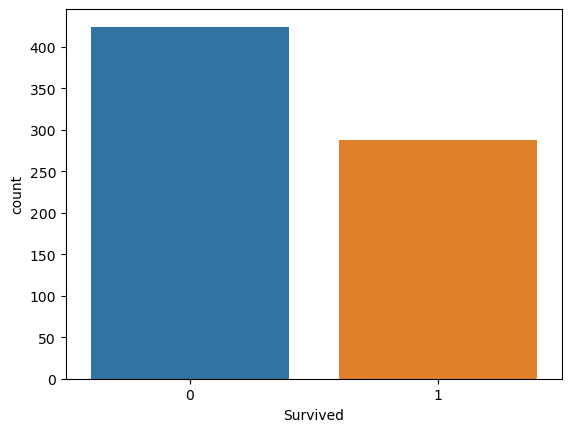

In [34]:
sns.countplot(x= "Survived",data=df)

- 3등석이 제일 많다.

<Axes: xlabel='Pclass', ylabel='count'>

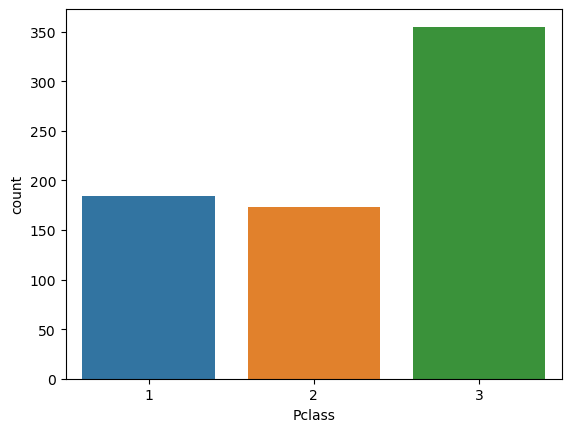

In [36]:
sns.countplot(x= "Pclass",data=df)

<Axes: xlabel='SibSp', ylabel='count'>

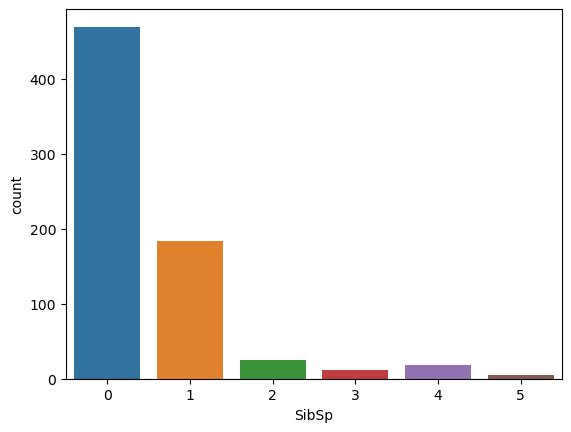

In [38]:
sns.countplot(x= "SibSp",data=df)

<Axes: xlabel='Parch', ylabel='count'>

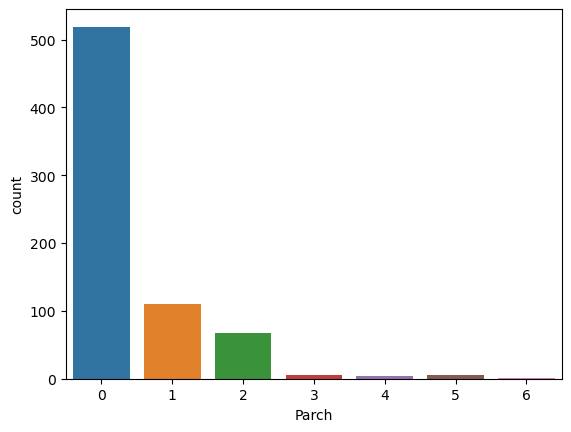

In [39]:
sns.countplot(x= "Parch",data=df)

c:\Users\chldu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Count'>

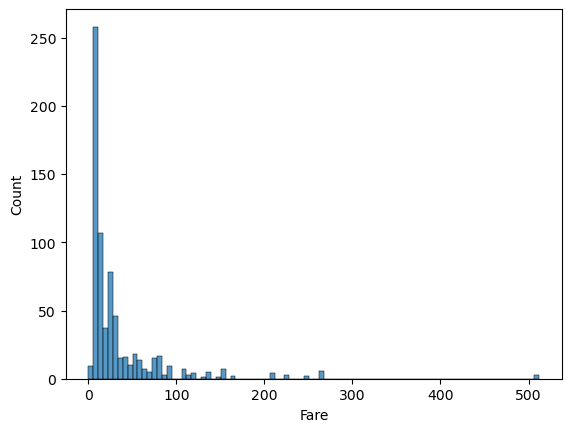

In [41]:
sns.histplot(x= "Fare",data=df)

### 성별과 생존 간의 관계 확인

- 남성 생존자가 여성보다 현저히 적음

<Axes: xlabel='Sex', ylabel='Survived'>

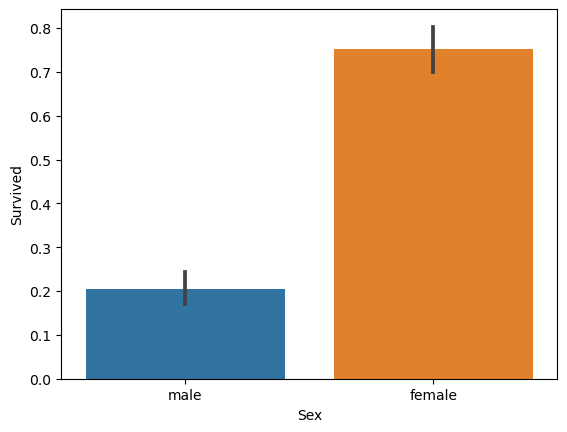

In [27]:
sns.barplot(x= "Sex", y = "Survived",data=df)

### 선실 등급과 생존 간의 관계 확인

- 선실 등급이 높을 수록 많이 살았음

<Axes: xlabel='Pclass', ylabel='Survived'>

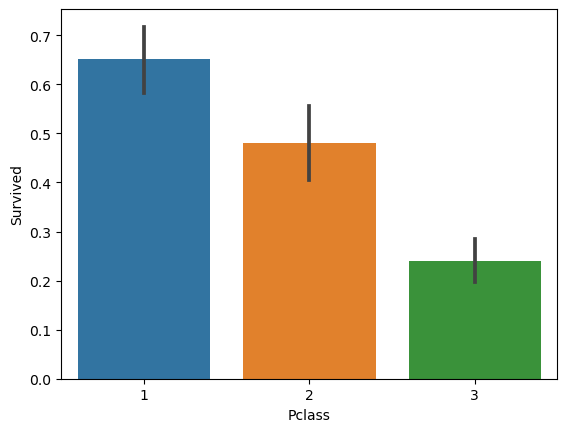

In [43]:
sns.barplot(x= "Pclass", y = "Survived",data=df)

### 나이와 생존 간의 관계 확인

- 나이를 그룹화해서 나눔

In [45]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

- 대체적으로 나이가 어릴수록 많이 생존함.

c:\Users\chldu\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='AgeGroup', ylabel='Survived'>

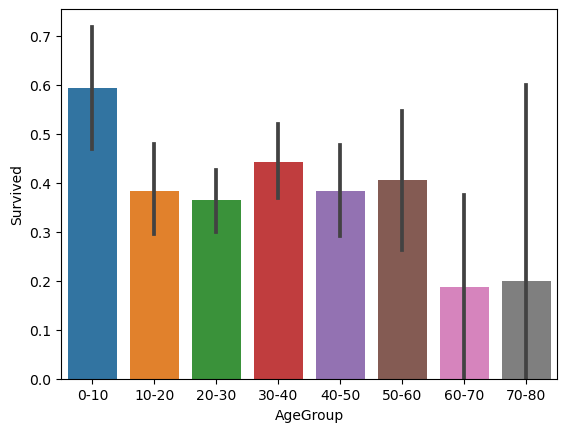

In [46]:
sns.barplot(x= "AgeGroup", y = "Survived",data=df)